# Bewerten von Modellen: K-Nearest Neighbors Classifier für Iris Daten
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=cdf8b73f-56a5-4598-9dae-e80bf63bfe8e)

## Verwenden eines Test-Sets

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

Lade Iris Daten und erzeuge daraus Feature Matrix sowie Labels Vektor:

In [2]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

**Ziel:** Trainiere ein Modell mit den Iris-Daten, so dass es dann für gegebene Sepal- und Petal-Längen und Breiten die Spezies angeben kann.

Um zu überprüfen, ob das resultierende Modell korrekt klassifiziert, entfernen wir **VOR** dem Training einen Teil des Datensatzes. Dieser kann dann anschließend zum Testen verwendet werden.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.7)

Wir verwenden nun **NUR** die ``_train`` Daten, um ein Modell zu trainieren.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Nun ist das Modell trainiert. Es hat die ``_test`` Daten **NOCH NIE** gesehen; diese sind somit aus Modellsicht neue, unbekannte Daten.

Auf diese Daten wenden wir nun das Modell an:

In [5]:
y_model = model.predict(X_test)

## Bewerten des Modells

Nun vergleichen wir die vom Modell vorhergesagten Daten ``y_model`` mit den korrekten Daten ``y_test``. Die Funktion ``accuracy_score()`` gibt den Anteil der korrekten Klassifizierungen an.

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9555555555555556

**Vorsicht:** Die hier erhaltene Genauigkeit hängt natürlich von der Wahl des Testsets ab - anderes Testset $\Longrightarrow$ andere Genauigkeit.

Natürlich können wir die Ergebnisse auch direkt betrachten und vergleichen:

In [7]:
y_model

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [8]:
y_test.head()

105     virginica
81     versicolor
109     virginica
59     versicolor
39         setosa
Name: species, dtype: object

``y_test`` behält die Indizes der original Iris Daten bei. Das erlaubt es uns, die vom Modell vorhergesagten Daten in die Iris Daten zu integrieren:

Dafür brauchen wir zuerst ein Objekt, welches mit solchen Indizes umgehen kann, eine ``pd.Series``. Diese füllen wir mit den Ergebnissen aus ``y_model`` und indizieren sie mit den Indizes aus ``y_test``.

In [9]:
import pandas as pd

In [10]:
y_model = pd.Series(y_model, index= y_test.index)
y_model

105     virginica
81     versicolor
109     virginica
59     versicolor
39         setosa
57     versicolor
33         setosa
43         setosa
5          setosa
77     versicolor
76     versicolor
37         setosa
101     virginica
1          setosa
40         setosa
97     versicolor
140     virginica
58     versicolor
49         setosa
88     versicolor
95     versicolor
127     virginica
147     virginica
90     versicolor
79     versicolor
70      virginica
67     versicolor
46         setosa
34         setosa
26         setosa
133    versicolor
129     virginica
103     virginica
139     virginica
89     versicolor
75     versicolor
142     virginica
122     virginica
144     virginica
141     virginica
8          setosa
87     versicolor
20         setosa
7          setosa
107     virginica
dtype: object

Diese um den passenden Index ergänzten ``y_model`` Daten können wir nun dem Iris DataFrame hinzufügen. In ``KN_species`` nicht enthaltene Daten sollen leer bleiben. Wir betrachten nur den Teil des DataFrame, in dem ``KN_species`` Einträge hat.

In [13]:
iris['KN_species'] = y_model
iris = iris.fillna(value = {'KN_species':''})
iris[iris.KN_species!='']

,sepal_length,sepal_width,petal_length,petal_width,species,KN_species
1,4.9,3.0,1.4,0.2,setosa,setosa
5,5.4,3.9,1.7,0.4,setosa,setosa
7,5.0,3.4,1.5,0.2,setosa,setosa
8,4.4,2.9,1.4,0.2,setosa,setosa
20,5.4,3.4,1.7,0.2,setosa,setosa
26,5.0,3.4,1.6,0.4,setosa,setosa
33,5.5,4.2,1.4,0.2,setosa,setosa
34,4.9,3.1,1.5,0.2,setosa,setosa
37,4.9,3.6,1.4,0.1,setosa,setosa
39,5.1,3.4,1.5,0.2,setosa,setosa


Wir betrachten nur den Teil des DataFrame, in dem ``species`` und ``KN_species`` verschieden sind, d.h. die falsch klassifizierten Samples.

In [15]:
iris.loc[iris.KN_species!=''].loc[iris.KN_species != iris.species]

,sepal_length,sepal_width,petal_length,petal_width,species,KN_species
70,5.9,3.2,4.8,1.8,versicolor,virginica
133,6.3,2.8,5.1,1.5,virginica,versicolor


Nun führen wir eine Hilfsvariable ``species_tmp`` ein, welche die einfache grafische Markierung derjenigen Samples ermöglicht, die falsch klassifiziert wurden.

Diese soll bei korrekter Klassifizierung die Spezies angeben, bei falscher Klassifizierung den Wert ``wrong``.

In [16]:
iris.loc[(iris.KN_species!='') & (iris.KN_species!=iris.species), 'species_tmp'] = 'wrong'
iris.loc[(iris.KN_species!='') & (iris.KN_species==iris.species), 'species_tmp'] = iris.species
iris.loc[(iris.KN_species==''), 'species_tmp'] = iris.species

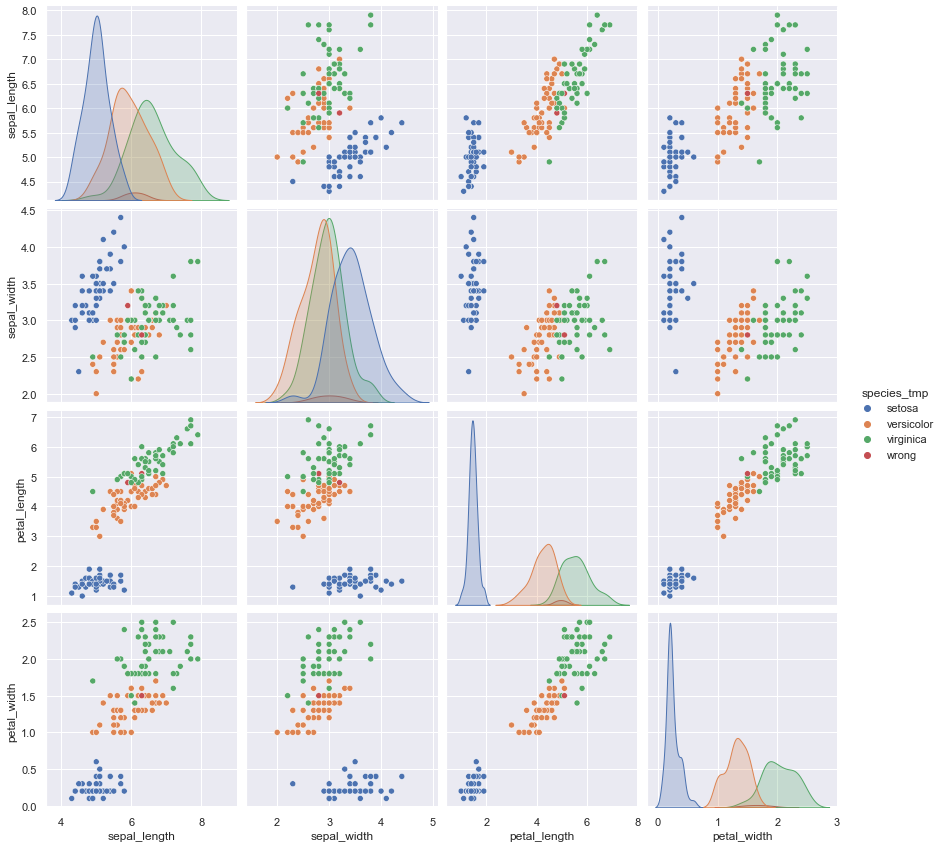

In [18]:
sns.pairplot(iris, hue='species_tmp', height = 3, hue_order=["setosa", "versicolor", "virginica", "wrong"])

## Cross Validation

### Einfachster Fall: Manuelle Aufteilung in zwei Durchgänge
Wir teilen die Trainingsdaten gleichmäßig in zwei Teile auf:

####  Code für die Visualisierung der Aufteilung

In [19]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', edgecolor='black'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray', ec='black'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "Durchgang {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

#### Visualisierung der Aufteilung

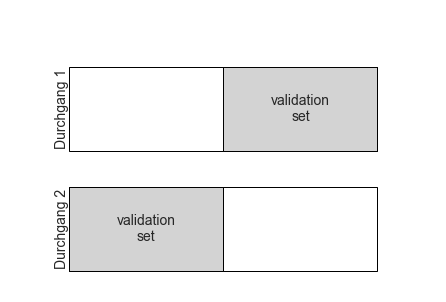

In [20]:
X1, X2, y1, y2 = train_test_split(X_train, y_train, random_state=0, train_size=0.5)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(2, ax, textprop=dict(size=14))

####  Durchgang 1
Das Modell wird nun auf dem Set ``1`` gefittet...

In [42]:
model.fit(X1,y1)

KNeighborsClassifier(n_neighbors=1)

...  und anschließend auf dem Set ``2`` bewertet:

In [22]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9622641509433962

####  Durchgang 2
Das Modell wird nun auf dem Set ``2`` gefittet...

In [23]:
model.fit(X2,y2)

KNeighborsClassifier(n_neighbors=1)

... und anschließend auf dem Set ``1`` bewertet:

In [24]:
y1_model = model.predict(X1)
accuracy_score(y1, y1_model)

0.9807692307692307

### Allgemeiner Fall: Automatische Aufteilung in beliebig viele Folds
Die oben manuell durchgeführte Aufteilung und das anschließende gegenseitige Trainieren und Testen kann automatisiert werden durch ``cross_val_score``. Dabei gibt der Parameter ``cv`` die Anzahl der sog. *Folds* an.

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5)

array([1.        , 1.        , 0.85714286, 1.        , 1.        ])

Der extremste Fall ist, dass es genauso viele Folds gibt wie Samples (im Trainingsset). D.h. Für jeden Durchgang wird genau ein Sample zur Validierung zurückgehalten.

In [43]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

Die Score ist jeweils entweder
- 0: d.h. das eine Validierungssample wurde falsch klassifiziert oder
- 1: d.h. das eine Validierungssample wurde korrekt klassifiziert.

Der Mittelwert ist ein gutes Maß dafür, wie gut das Modell ist:

In [44]:
scores.mean()

0.9523809523809523